In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt

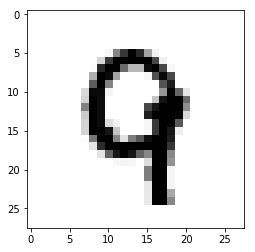

9


In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

exampleindex = 334
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
x_train.shape

(60000, 784)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.0058 - acc: 0.7639 - val_loss: 0.6051 - val_acc: 0.8644
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.5558 - acc: 0.8638 - val_loss: 0.4775 - val_acc: 0.8821
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.4747 - acc: 0.8769 - val_loss: 0.4270 - val_acc: 0.8909
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.4354 - acc: 0.8846 - val_loss: 0.3988 - val_acc: 0.8953
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.4110 - acc: 0.8896 - val_loss: 0.3797 - val_acc: 0.8987
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3940 - acc: 0.8936 - val_loss: 0.3663 - val_acc: 0.9016
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3812 - acc: 0.8963 - val_loss: 0.3561 - val_acc

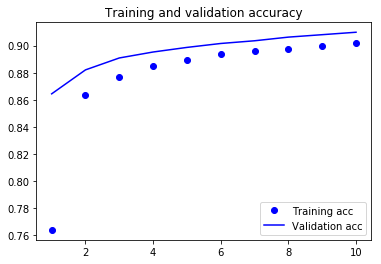

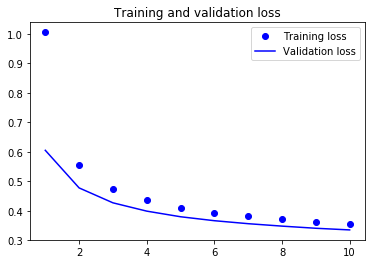

In [7]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
print(model.predict(digitimage.reshape(-1, 28*28)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
